# Unsupervised outliers detection (event detection)

In [ ]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec

from drama.cae2d import *
from drama.outlier_finder import grid_run_drama

from keras.datasets import mnist

%matplotlib inline

In [2]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
inlier_labels = [3,4,6,8]
outlier_labels = [5,0]
n_inliers = 3000
n_outliers = 10

X = []
y = []
for i in inlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_inliers])
    y.extend(n_inliers*[i])
    
for i in outlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_outliers])
    y.extend(n_outliers*[i])
    
X = np.array(X)
y = np.array(y)
X = np.reshape(X, [-1, image_size, image_size, 1])

In [4]:
X = np.reshape(x_train, [-1, image_size, image_size, 1])
y = y_train

In [5]:
X = []
y = []
labels = [1,2]
for i in labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt])
    y.extend(ns*[i])
    
X = np.array(X)
y = np.array(y)
X = np.reshape(X, [-1, image_size, image_size, 1])

In [6]:
X.shape,y.shape

((12700, 28, 28, 1), (12700,))

In [7]:
sum(y==4)

0

In [8]:
cvae2d = ConvolutionalVariationalAutoEncoder2D(input_dim_x = 28,
                                               input_dim_y = 28,
                                               latent_dim = 2,
                                               filters = 8,
                                               filter_factor = 2,
                                               n_conv = 4,
                                               transpose = 1)
cvae2d.summary()

W1118 18:05:01.843987 140080955123520 training_utils.py:1348] Output cropping2d missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to cropping2d.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 8)    208         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 8)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 16)   3216        max_pooling2d[0][0]              
____________________________________________________________________________________________

In [9]:
cvae2d.train(X,training_epochs=15,early_stop=0)

Train on 12700 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
Epoch 1/15
12700/12700 [==============================] - 21s 2ms/sample - loss: 51.9713

Epoch 00002: LearningRateScheduler reducing learning rate to 0.05.
Epoch 2/15
12700/12700 [==============================] - 21s 2ms/sample - loss: 39.5110

Epoch 00003: LearningRateScheduler reducing learning rate to 0.025.
Epoch 3/15
12700/12700 [==============================] - 21s 2ms/sample - loss: 38.4810

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0125.
Epoch 4/15
12700/12700 [==============================] - 21s 2ms/sample - loss: 38.0651

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00625.
Epoch 5/15
12700/12700 [==============================] - 20s 2ms/sample - loss: 37.9308

Epoch 00006: LearningRateScheduler reducing learning rate to 0.003125.
Epoch 6/15
12700/12700 [==============================] - 21s 2ms/sample - loss: 37.8365

Epoch 00007: LearningRate

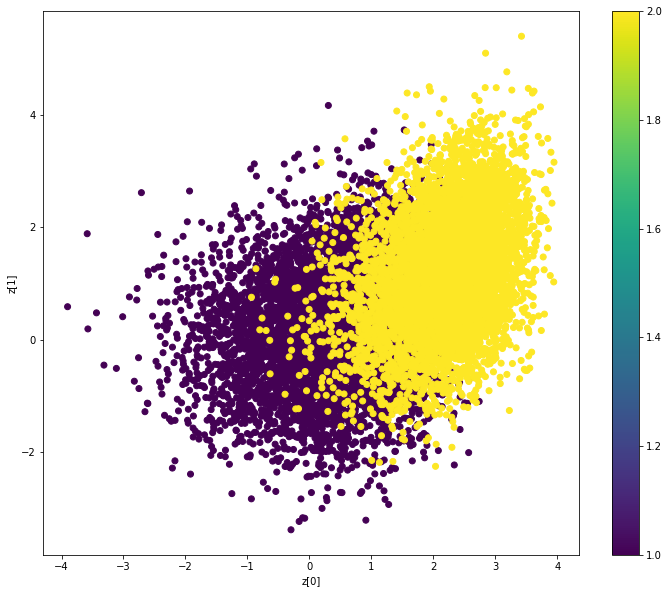

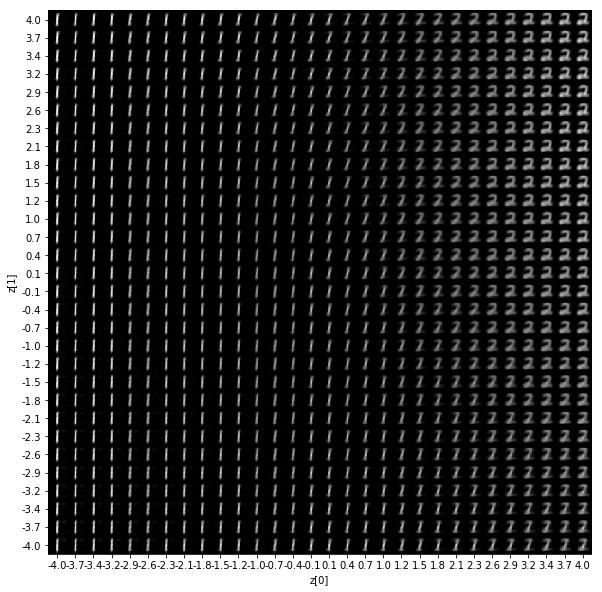

In [10]:
cvae2d.illustration(data = (X,y))

In [20]:
X = np.reshape(X, [-1, image_size*image_size])

In [21]:
df = drm.sk_check(X.reshape(-1,784),X.reshape(-1,784),y,[1])

/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [22]:
df

,method,AUC,MCC,RWS
0,LOF35,0.90794,0.0928,0.128571
1,i-forest,0.68152,0.1432,0.166667


# Outlier detection

Unsupervised outlier detection mode.


W1116 19:21:45.018787 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:22:25.954258 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:22:47.767972 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:24:42.579233 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:25:25.008066 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:25:57.426306 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:27:27.562603 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:28:05.845240 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:28:35.750273 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:30:15.950171 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:31:05.068086 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:31:35.685768 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:33:10.237427 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:34:00.941555 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:34:27.686230 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Text(0, -30, '** Colors depend on AUC.')

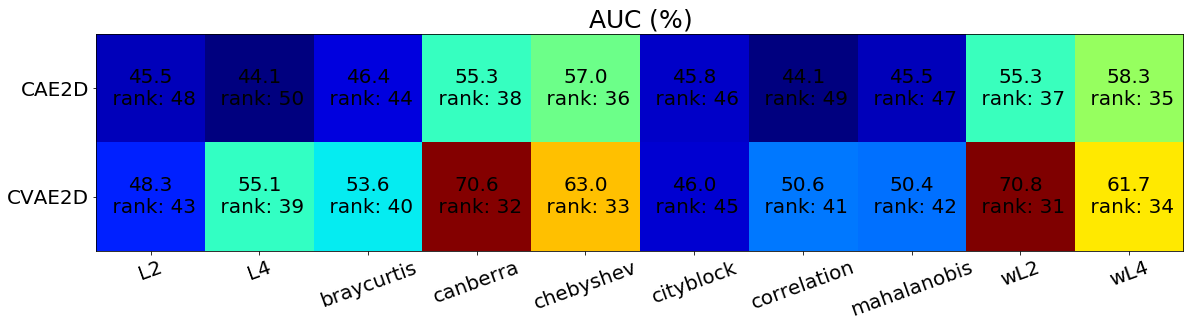

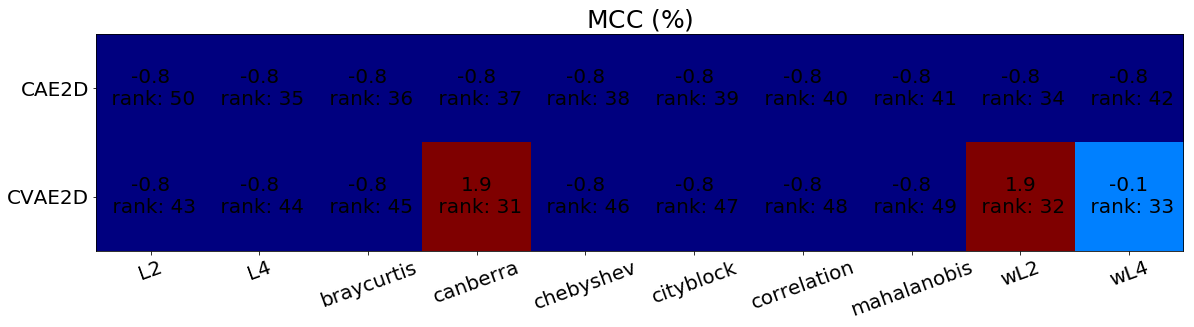

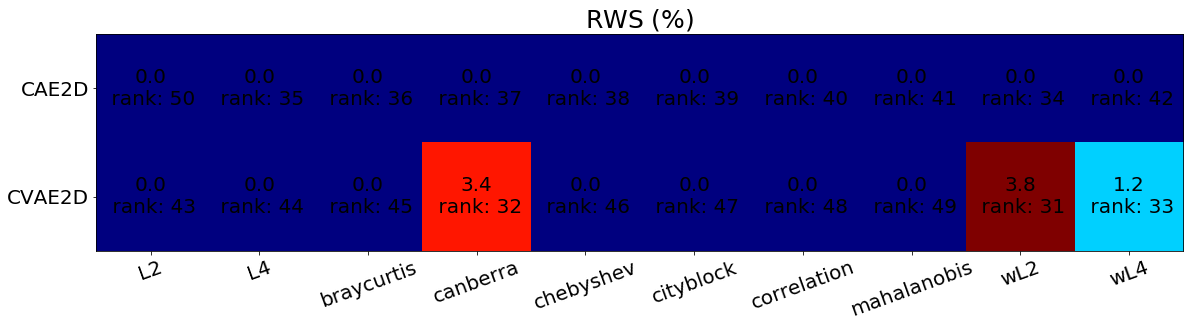

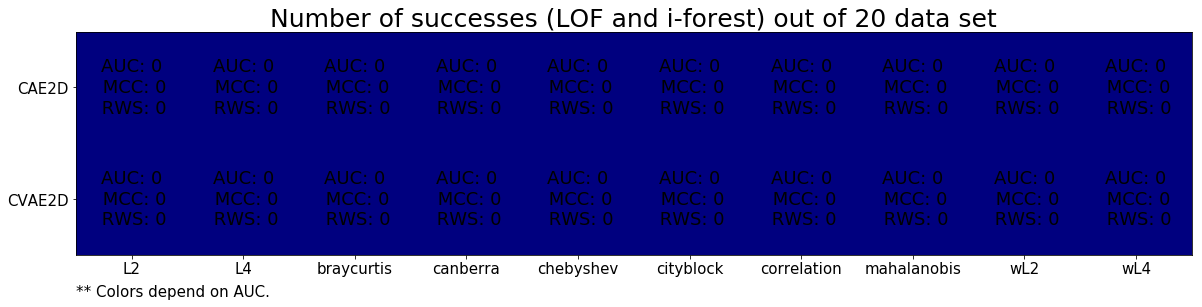

In [27]:
metrics = ['cityblock', 'L2', 'L4', 'braycurtis', 'canberra', 'chebyshev',
                        'correlation', 'mahalanobis', 'wL2', 'wL4']
drt_list = ['CAE2D', 'CVAE2D']

result = []
for i in range(n_try):
#     auc,mcc,rws,conf = grid_run_drama(X,y)
    auc,mcc,rws,conf = grid_run_drama(X,y,
                                      drt_list=drt_list,
                                      metrics=metrics,
                                      n_split=2)
    
    arr = np.stack([auc,mcc,rws],axis=-1)
    result.append(arr)


In [ ]:
result = np.array(result)

drts = np.unique(conf[:,1])
metrs = np.unique(conf[:,2])

res = result.reshape(n_try,len(drt_list),len(metrics),-1)

drm.plot_table(np.mean(res,axis=0),drts,metrs)

auc = np.sum((res[:, :, :, 0].T>lof_all[:, 0]) & (res[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
mcc = np.sum((res[:, :, :, 1].T>lof_all[:, 1]) & (res[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
rws = np.sum((res[:, :, :, 2].T>lof_all[:, 2]) & (res[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

fig = plt.figure(figsize=(20,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

width, height = auc.shape

for x in range(width):
    for y in range(height):
        ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=18);

plt.xticks(range(len(metrs)),metrs,fontsize=15)
plt.yticks(range(len(drts)), drts,fontsize=15)

plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
             textcoords='offset points', va='top',fontsize=15)

# plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

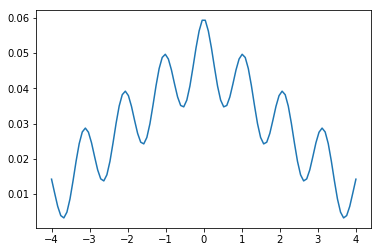

In [23]:
x = np.linspace(-4,4,100)
y = 0.05-0.01*np.abs(x)+0.01*np.cos(6*x)
plt.plot(x,y)